# Workshop 2: Image Segmentation

In this workshop we will how to implement a segmentation model based in UNet and ResNet with [fastai](https://https://www.fast.ai/). The structure of the workshop will be as follows:


1.   Load and explore data
2.   Train the model
3.   Evaluate results

In [ ]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download dataset
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images')]

In [ ]:
# Number of images
len((path / "images").ls())

100

In [ ]:
# Number of masks
len((path / "labels").ls())

100

In [ ]:
(path / "images").ls()[0], (path / "labels").ls()[0]

(Path('/root/.fastai/data/camvid_tiny/images/0016E5_08057.png'),
 Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08009_P.png'))

(96, 128)


<Axes: >

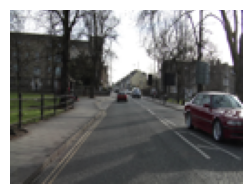

In [ ]:
# Show image and size
img_name = Path("Seq05VD_f00090.png")
img = PILImage.create(path / "images" / img_name)
print(img.shape)
img.show()

(96, 128)


<Axes: >

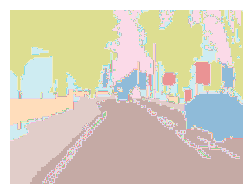

In [ ]:
# Show mask and size
mask_name = img_name.stem + "_P" + img_name.suffix #.stem es que me de todo lo que haya antes del .png, |luego añado el _P y| el suffix lo que hace es añadir el .png
mask = PILMask.create(path / "labels" / mask_name)
print(mask.shape)
mask.show()

In [ ]:
# Show labels names
codes = np.loadtxt(path/'codes.txt', dtype=str)
len(codes), codes

(32,
 array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
        'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
        'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
        'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
        'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
        'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
        'VegetationMisc', 'Void', 'Wall'], dtype='<U17'))

In [ ]:
# Show mask matrix
value_list = list(mask.getdata())
print(len(value_list))
value_list[0], value_list[150], value_list[1238], value_list[5000], value_list[12000]

12288


(26, 26, 26, 30, 17)

In [ ]:
min(value_list), max(value_list)

(4, 30)

# 1. Load and explore data

En segmentación las imagenes siempre se configuran asi asi que el codigo es replicable

In [ ]:
# Function to get label path from image name
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}" #dado el nombre de las imagenes lo que hace es buscar la máscara asociada a esa imagen | el fn es el nombre de la imagen

In [ ]:
# Get list of image paths
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_08057.png')

In [ ]:
# Create dataloader
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

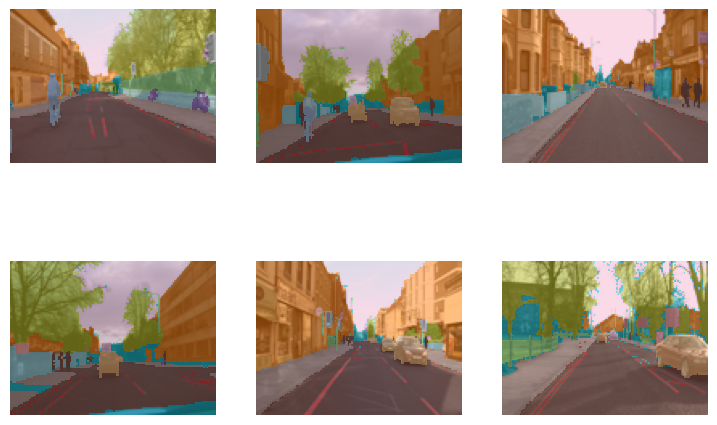

In [ ]:
# Show batch
dls.show_batch(max_n=6)

# 2. Train the model

In [ ]:
# Initialize model
learn = unet_learner(dls, resnet34) # restet34 es invertir los empequecimientos que se hacen en la fase convolucional permitiendo en la parte de la u hacia arriba hacer las imagenes más grandes| es unet es el modelo de segmentación más usado

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 31.7MB/s]


In [ ]:
# Train model
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,2.787148,2.408139,01:28


epoch,train_loss,valid_loss,time
0,1.646965,1.412333,01:36
1,1.523161,1.319413,01:44
2,1.405401,1.149584,01:42
3,1.274855,0.968932,01:49
4,1.151415,0.861775,01:38
5,1.051282,0.833673,01:35


# 3. Show results

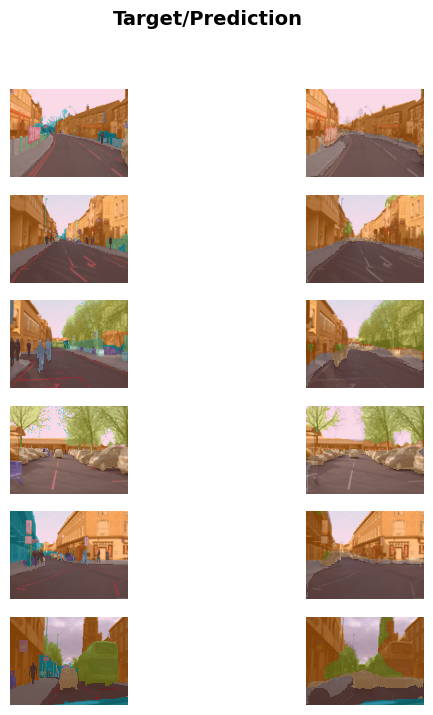

In [ ]:
# Show results
learn.show_results(max_n=6, figsize=(7,8))

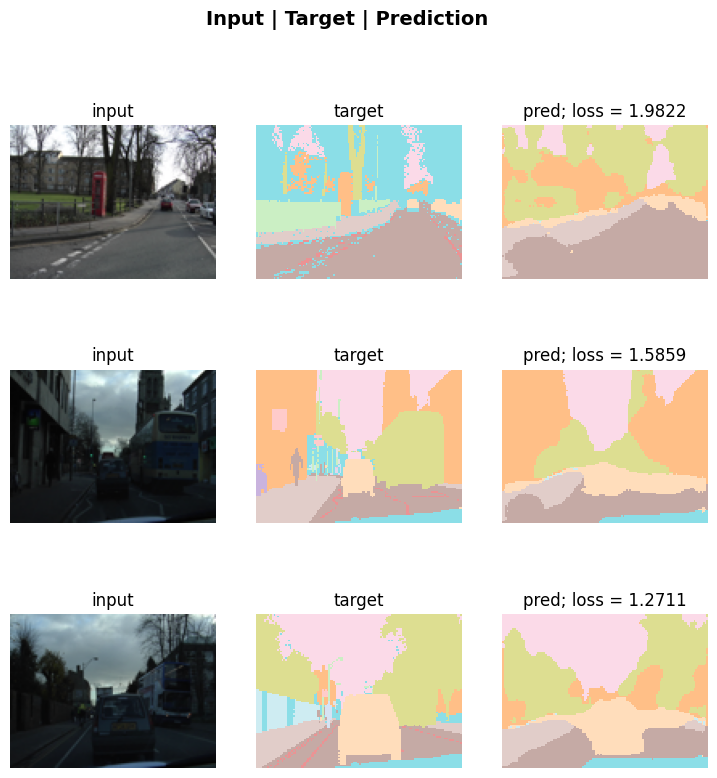

In [ ]:
# Show worst cases
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

# Exercise 1: Improve the model using all the techniques seen in the classification notebook. Use fastai documentation if needed.

In [ ]:
# Create dataloader with data augmentation
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes,
    batch_tfms=aug_transforms(size=224)
)

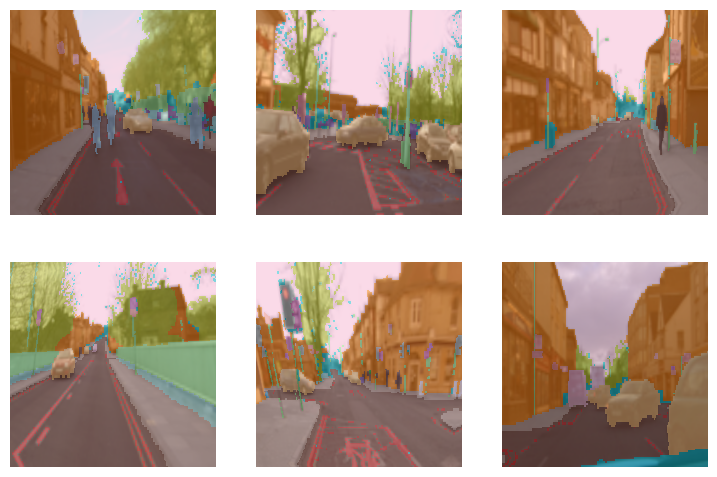

In [ ]:
# Show batch
dls.show_batch(max_n=6)

In [ ]:
# Initialize learner with DiceMulti as metric
learn = unet_learner(dls, resnet34, metrics=[DiceMulti()])

SuggestedLRs(valley=0.00010964782268274575)

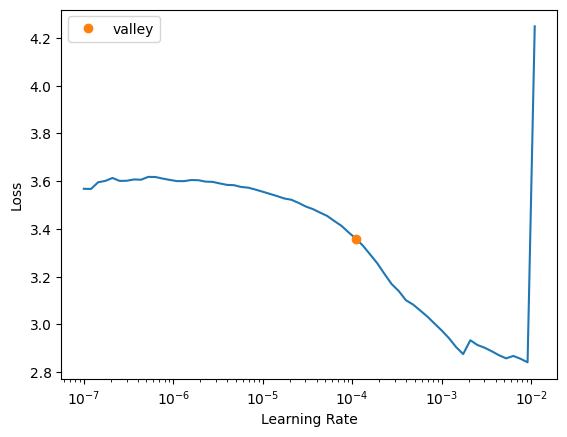

In [ ]:
# Find lr
learn.lr_find()

In [ ]:
# Train the model
learn.fine_tune(5, 2e-4)

epoch,train_loss,valid_loss,dice_multi,time
0,3.211459,2.348597,0.026395,05:45


epoch,train_loss,valid_loss,dice_multi,time
0,2.225636,1.776635,0.095891,06:03
1,1.878712,1.335266,0.119831,06:01
2,1.651167,1.111407,0.137460,06:02
3,1.485626,0.975386,0.164256,06:05
4,1.369752,0.962216,0.166476,06:06


In [ ]:
# Show results

In [ ]:
# Do anything you consider to improve the model